# Concept

[![Twitter Handle](https://img.shields.io/badge/Twitter-@gaohongnan-blue?style=social&logo=twitter)](https://twitter.com/gaohongnan)
[![LinkedIn Profile](https://img.shields.io/badge/@gaohongnan-blue?style=social&logo=linkedin)](https://linkedin.com/in/gao-hongnan)
[![GitHub Profile](https://img.shields.io/badge/GitHub-gao--hongnan-lightgrey?style=social&logo=github)](https://github.com/gao-hongnan)
![Tag](https://img.shields.io/badge/Tag-Hash_Map-orange)

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
from IPython.display import display
from typing import Generator, List, Union, Any
from rich.pretty import pprint
from array import array

import sys
from pathlib import Path

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.dsa.complexity.benchmark import time_complexity_analyzer
    from omnivault.utils.reproducibility.seed import seed_all
else:
    raise ImportError("Root directory not found.")

seed_all(42, False, False)

42

## Introduction

**[Hash maps](https://en.wikipedia.org/wiki/Hash_table)**, also known as hash
tables, are a critical and frequently used data structure in computer science. A
hash map is a data structure that implements an
**[associative array abstract data type](https://en.wikipedia.org/wiki/Associative_array)**,
a structure that can map keys to values. This key-value pairing lends itself to
efficient querying and manipulation of data.

In a hash map, each **key** is unique and is used to pinpoint the location of
its corresponding **value** in the structure. This is done by applying a
**[hash function](https://en.wikipedia.org/wiki/Hash_function)** to the key,
which translates it into a hash, a fixed-size result or index that represents
the location of the corresponding value. The hash function is vital to the
performance of the hash map. It is designed to distribute keys evenly across the
array to minimize clustering and ensure an average time complexity of
$\mathcal{O}(1)$ for basic operations.

This direct mapping from key to index allows for
**[rapid access, insertion, and removal of data](https://en.wikipedia.org/wiki/Hash_table#Advantages_and_disadvantages)**,
making hash maps highly efficient for dealing with large datasets. However, it's
essential to note that hash maps can encounter
**[hash collisions](https://en.wikipedia.org/wiki/Collision_resolution)**, a
situation where two different keys yield the same hash. This problem is
typically addressed using various collision resolution techniques, such as
chaining or open addressing.

Hash maps form the foundation of many high-level data structures and are vital
in solving complex problems due to their unique properties of efficient storage
and retrieval. For a deeper understanding of their intricacies and their wide
range of applications, visit their details on
**[Wikipedia](https://en.wikipedia.org/wiki/Hash_table)**.

## Common Notations

```{list-table} Hash Map Notations
:header-rows: 1
:name: hashmap-notations

* - Term
  - Definition
  - Example
* - **Hash Map** (also called **Hash Table**)
  - A data structure implementing an associative array abstract data type. It
    maps keys to values using a **hash function** to compute an index into an
    array of **buckets** or slots.
  - `hash_map = {'apple': 1, 'banana': 2, 'orange': 3}`
* - **Key**
  - The identifier by which a value is associated and retrieved in a hash map.
    Each key is unique within the hash map.
  - Given `key='apple'`, then `hash_map[key]` returns `1`.
* - **Value**
  - The specific data element associated with a key in a hash map.
  - In the hash map `{'apple': 1, 'banana': 2, 'orange': 3}`, `1` is a value.
* - [**Hash Function**](https://en.wikipedia.org/wiki/Hash_function#:~:text=A%20hash%20function%20is%20any,%2C%20digests%2C%20or%20simply%20hashes.)
  - A function used to map a data element (the key) to a fixed address in the
    hash map. A good hash function produces a uniform distribution across the
    array for various keys and minimizes collisions.
  - Various techniques exist such as Division Method, Multiplication Method, etc.
* - **Bucket**
  - A slot in the hash map where key-value pairs are stored. The hash function
    determines the index of these buckets.
  - In a hash map as an array of size 10, bucket 5 might store key-value pairs
    `('apple', 1)` and `('grape', 2)`.
* - **Collision**
  - A situation when two different keys hash to the same index in a hash map.
    Various collision resolution techniques exist, such as chaining or open
    addressing.
  - If both `'apple'` and `'grape'` hash to the same index, this is a collision.
* - **Load Factor**
  - A measure that decides when to increase the hash map capacity to maintain
    efficiency. It's calculated by dividing the number of occupied buckets by the
    total number of buckets.
  - If a hash map has 100 buckets and 75 are occupied, the load factor is `0.75`.
```

## Advantages of Hash Maps

### Efficient Key-Value Access

Elements in a hash map are accessed through keys, which are hashed to compute an
index in the array where the corresponding value is stored. If you know the key
of the desired element, you can retrieve the value in constant time, denoted as
[$\mathcal{O}(1)$](https://en.wikipedia.org/wiki/Time_complexity#Constant_time).

This is possible because a hash function is used to map keys to their associated
values directly. The operation is quick and is independent of the size of the
hash map, which is why accessing an element in a hash map by its key is a
constant time
[$\left(\mathcal{O}(1)\right)$](https://en.wikipedia.org/wiki/Time_complexity#Constant_time)
operation.

In [2]:
@time_complexity_analyzer(data_type="dict", repeat=10, plot=True)
def dict_access(n: int, dict_: Dict[int, int]) -> None:
    _ = dict_[n - 1]

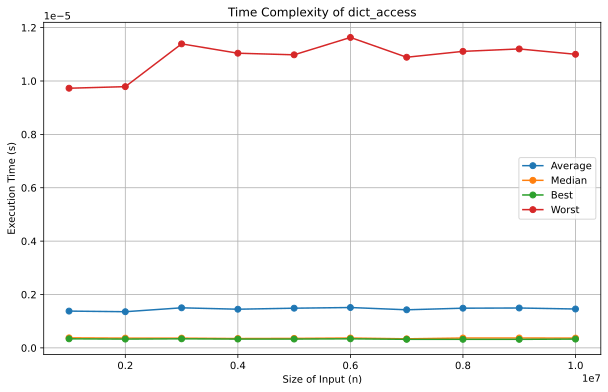

In [3]:
n_sizes = range(1000000, 10000001, 1000000) # 1M to 10M
_ = dict_access(n_sizes)

### Accommodate Dynamic Size

Unlike arrays, hash maps are dynamic, which means they can grow or shrink in
size as required. This property gives hash maps a significant advantage when the
number of entries is not known in advance or when entries need to be added or
removed dynamically.

### Key-Value Pairs

Hash maps store data as key-value pairs, which can be a more intuitive and
flexible way to organize data. This is especially useful when each piece of data
is associated with a unique identifier, like a name, an ID number, or a login
handle.

## Disadvantages of Hash Maps

### Inefficient Space Usage

Hash maps can be space-inefficient. They typically reserve more space than
necessary to account for the potential addition of new key-value pairs and to
minimize the occurrence of hash collisions. This leads to an increased memory
footprint, especially when the load factor (the ratio of the number of entries
to the number of slots) is low.

### No Order of Elements

Hash maps do not maintain any order of elements. If you need to retrieve or
display key-value pairs in a specific order (such as in ascending order of keys
or values), you would need to sort the hash map, which requires additional time.

### Complexity of Collision Resolution

In cases where multiple keys hash to the same index (a collision), the hash map
needs to have a strategy to resolve the collision. Collision resolution
strategies like chaining or open addressing can be complex to implement and
understand.

### Hash Function Dependence

The performance of a hash map significantly depends on the quality of the hash
function. A poor hash function that leads to many collisions can degrade the
performance of key lookups, insertions, and deletions from constant time to
linear time in the worst case.

### No Direct Support for Sorting

Hash maps do not directly support sorting of their keys or values. If you need
to keep your keys or values sorted, you'll have to sort the hash map manually or
use a data structure that maintains order, such as a tree-based map.

## Complexity Analysis

### Time Complexity

Let's consider a Python dictionary named `hashmap` for illustrative purposes.

```{list-table} Time Complexity of Dictionary Operations
:header-rows: 1
:name: dict_time_complexity

* - Operation
  - Python Syntax
  - Best Case
  - Average Case
  - Worst Case
  - Description
* - Access
  - `hashmap[key]`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - Accessing a value by its key in a dictionary is a constant time operation on
    average. However, due to potential hash collisions, the worst case could
    be linear.
* - Search
  - `key in hashmap`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - Searching for a key in the dictionary is also a constant time operation on
    average. Worst case could be linear due to hash collisions.
* - Insert
  - `hashmap[key] = value`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - Inserting a key-value pair in a dictionary is typically a constant time
    operation. However, in the worst case, when a rehashing is necessary,
    the operation may take linear time.
* - Delete
  - `del hashmap[key]`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - Deleting a key-value pair is a constant time operation on average.
    In the worst case, due to potential hash collisions, it can take linear time.
```

In [4]:
@time_complexity_analyzer(data_type="dict", repeat=10, plot=True)
def dict_set(n: int, dict_: Dict[int, int]) -> None:
    dict_[n] = n


@time_complexity_analyzer(data_type="dict", repeat=10, plot=True)
def dict_search(n: int, dict_: Dict[int, int]) -> None:
    _ = n in dict_


@time_complexity_analyzer(data_type="dict", repeat=10, plot=True)
def dict_access(n: int, dict_: Dict[int, int]) -> None:
    _ = dict_[n - 1]

@time_complexity_analyzer(data_type="dict", repeat=10, plot=True)
def dict_delete(n: int, dict_: Dict[int, int]) -> None:
    for i in range(n):
        if i in dict_:
            del dict_[i]

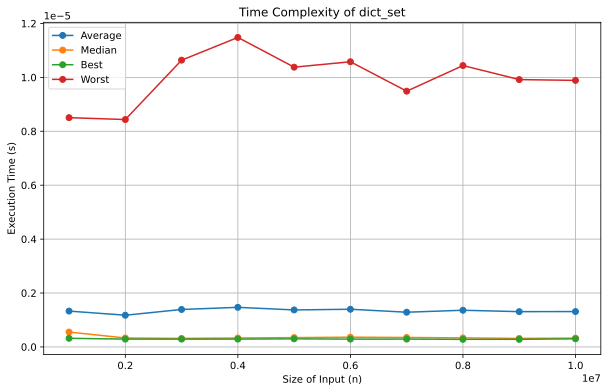

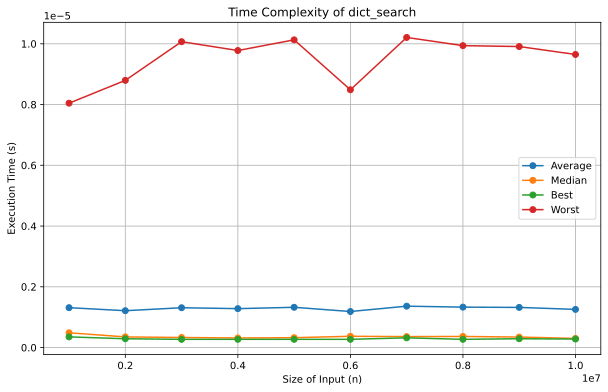

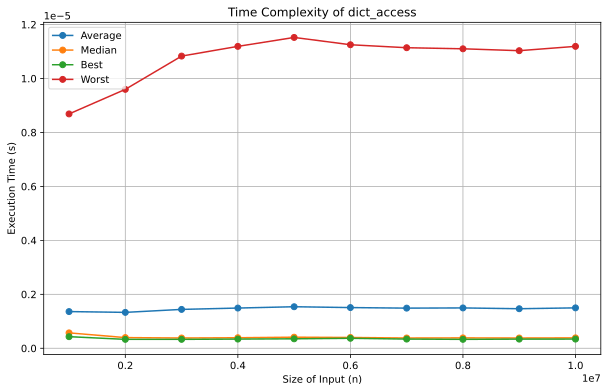

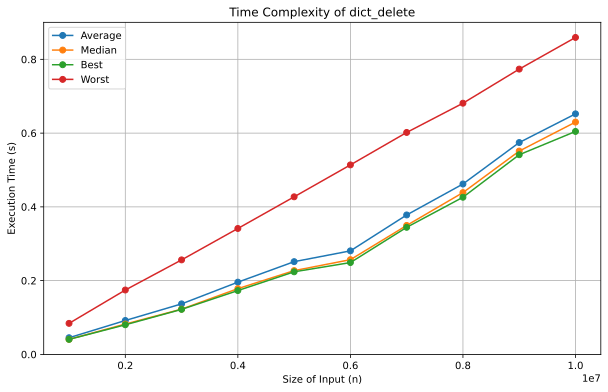

In [5]:
n_sizes = range(1000000, 10000001, 1000000) # 1M to 10M
for func in [dict_set, dict_search, dict_access, dict_delete]:
    _ = func(n_sizes)

The function to test hashmap `del` does not work properly because of the way
`time_complexity_analyzer` works. It does not delete the key from the dict, so
the next time the function is called, it will not find the key and will not
delete it. A simple workaround without modifying the decorator is to use a for
loop and confirm the time complexity is now $\mathcal{O}(n)$ instead of
$\mathcal{O}(1)$.

### Space Complexity

Space complexity is a measure of the amount of memory an algorithm needs to run
to completion. Just like time complexity, space complexity is typically
expressed using Big-O notation.

Let's consider the space complexity of Python dictionaries:

```{list-table} Space Complexity of Dictionary
:header-rows: 1
:name: dict_space_complexity

* - Operation
  - Python Syntax
  - Big-O Notation
  - Description
* - Initializing
  - `hashmap = {i: None for i in range(n)}`
  - $\mathcal{O}(n)$
  - Initializing a dictionary with `n` elements requires `n` units of space.
* - Inserting
  - `hashmap[key] = value`
  - $\mathcal{O}(n)$
  - Inserting a key-value pair might require resizing the dictionary,
    which involves creating a new dictionary and copying all key-value pairs
    from the old dictionary. In the worst case, this requires `n` units of space.
```

In most cases, both time and space complexity are important considerations when
writing code. Sometimes, you can trade off between the two: you can sometimes
make your code run faster by using more memory (a technique sometimes called
space-time tradeoff), or you can make your code use less memory by accepting
that it will run slower. The right balance between time and space complexity
depends on the specific requirements of your program.

### The Space-Time Tradeoff

In computer science, the term
[**space-time tradeoff**](https://en.wikipedia.org/wiki/Space%E2%80%93time_tradeoff)
refers to a situation where the efficiency of an algorithm can be improved
through consuming more memory, or, inversely, memory usage can be decreased at
the cost of slower execution times. In essence, you can **save time** by using
more **space**, or conserve space by investing more time.

Consider a scenario where you are given a sizable array of integers and tasked
with determining whether a certain integer is present within this array. Using a
standard search approach, on average, you would need
$\mathcal{O}(n)$[^linear_search] time to locate the integer in the array. This
could become inefficient if this operation has to be repeated numerous times.

In such a case, it would be more prudent to create a
[hash map](https://en.wikipedia.org/wiki/Hash_table) of the array, then check
for membership within this hash map. Although this would require additional
$\mathcal{O}(n)$
[**_auxiliary space_**](https://www.geeksforgeeks.org/g-fact-86/), the time
complexity for each membership check would be reduced to $\mathcal{O}(1)$.

This means that each subsequent membership check, by simply hashing the item and
verifying its presence in the hash map, would be significantly faster compared
to performing a linear search through the array. However, this expedited process
comes at the expense of increased memory usage needed to store the hash map,
thus exemplifying a classic
[**space-time tradeoff**](https://en.wikipedia.org/wiki/Space%E2%80%93time_tradeoff).

#### Example

Let's consider the below experiment to understand the space-time tradeoff
better.

In [6]:
# Let's say we have a list of one million items
my_list = list(range(1, 1000001))

# And we want to check if an item exists in the list
item_to_check = 999999

# This operation has a time complexity of O(n) because it might need to
# go through every single item in the list in the worst case
print(item_to_check in my_list)  # returns True


# Now let's say we store the items in a dictionary (which is a hash table in Python)
my_dict = {item: True for item in my_list}

# Checking if an item exists in the dictionary is generally an O(1) operation
print(item_to_check in my_dict)  # returns True

True
True


Of course, this assumes that we are only interested in checking for membership
because hash map removes the duplicates.

**Exercise: Can you construct a statistically reliable experiment to test the
following hypotheses?**

1. What is the threshold size for a list, beyond which it becomes more efficient
   to convert it into a hash map for membership checks?
2. Given a list of size $N = 100000$, how many membership checks should be
   conducted before it becomes more efficient to convert the list into a hash
   map for these operations?

## Common Clarifications and Corner Cases

```{list-table} Interview Tips for Hash Map Problems
:header-rows: 1
:name: hashmap_interview_tips

* - Tip
  - Clarify
  - Example
* - **Clarify keys and values**
  - Discuss the types of keys and values. Are they integers,
  strings, or objects? Can values be null?
  - `hash_map = {1: 'one', 2: 'two', 3: 'three'}`
* - **Understand hash collision**
  - Hash collisions are inevitable. Understand how your language
  handles them (chaining, open addressing, etc.).
  - Python dict handles hash collisions internally.
* - **Beware of key absence**
  - Accessing a key that doesn't exist will cause an error.
  - `hash_map['missing']` results in `KeyError`. Use
  `hash_map.get('missing')` instead.
* - **Understand time complexity**
  - Most operations are $\mathcal{O}(1)$, but can degrade to $\mathcal{O}(n)$
    due to hash collisions.
  - Inserting n items is generally $\mathcal{O}(n)$, but can become
    $\mathcal{O}(n^2) in the worst case.
* - **Always consider corner cases**
  - How does your algorithm handle an empty hash map, a map with
  one key-value pair, or duplicate values?
  - Consider empty map (`{}`), single pair (`{'one': 1}`), or
  duplicates (`{'one': 1, 'uno': 1}`).
* - **Hash Map resizing**
  - When a map's load factor exceeds a threshold, it will be
  resized, increasing time complexity.
  - Python's dict resizes when too full, causing a temporary $\mathcal{O}(n)$
  operation.
* - **Use for item search**
  - Hash maps are efficient for searching operations, use them
  when you need to look up items.
  - Use a hash map to store numbers as keys for $\mathcal{O}(1)$ lookups.
```

## References and Further Readings

-   [Tech Interview Handbook - Yang Shun](https://www.techinterviewhandbook.org/algorithms/hash-table/)
-   [Runestone Academy: Hashing](https://runestone.academy/ns/books/published/pythonds/SortSearch/Hashing.html#implementing-the-map-abstract-data-type)
-   [Taking Hash Tables Off The Shelf - Vaidehi Joshi](https://medium.com/basecs/taking-hash-tables-off-the-shelf-139cbf4752f0)

[^linear_search]:
    Searching for an item in an array is a linear operation because it requires
    examining each element in the array to confirm its presence.